# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [265]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
sns.set()
from scipy import stats
from sklearn.metrics import mean_squared_error

np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [266]:
df = pd.read_csv("/Users/aditya/Documents/bootcamp_aditya_shah/homework/stage08_exploratory-data-analysis/data/homework8_data.csv")

In [267]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          160 non-null    object 
 1   region        160 non-null    object 
 2   age           160 non-null    float64
 3   income        155 non-null    float64
 4   transactions  160 non-null    int64  
 5   spend         157 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 7.6+ KB
(160, 6)


In [268]:
df = df.dropna()

In [269]:
print(df)

           date region   age    income  transactions   spend
0    2021-02-01   West  37.6  28086.81             4   73.35
1    2021-02-02  North  43.0  33034.75             1   52.37
2    2021-02-03  South  38.2  50045.39             2  131.85
3    2021-02-04  South  24.9  39467.28             4  147.58
4    2021-02-05  South  59.8  31201.65             1   86.76
..          ...    ...   ...       ...           ...     ...
155  2021-07-06  South  39.3  57863.60            20  136.87
156  2021-07-07   East  41.4  43912.51             5  116.26
157  2021-07-08   East  30.9  53308.27             2  134.47
158  2021-07-09   East  34.8  28731.93             2   82.64
159  2021-07-10   West  44.7  62816.06             3  118.15

[152 rows x 6 columns]


In [270]:
def detect_outliers_iqr(series: pd.Series, k: float = 1.5) -> pd.Series:
    """Return boolean mask for IQR-based outliers.
    Assumptions: distribution reasonably summarized by quartiles; k controls strictness.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper)



In [271]:
target_col = 'spend' if 'spend' in df.columns else df.select_dtypes(include=['number']).columns[0]
df['outlier_iqr'] = detect_outliers_iqr(df[target_col])
df[['outlier_iqr']].mean()  # fraction flagged

outlier_iqr    0.006579
dtype: float64

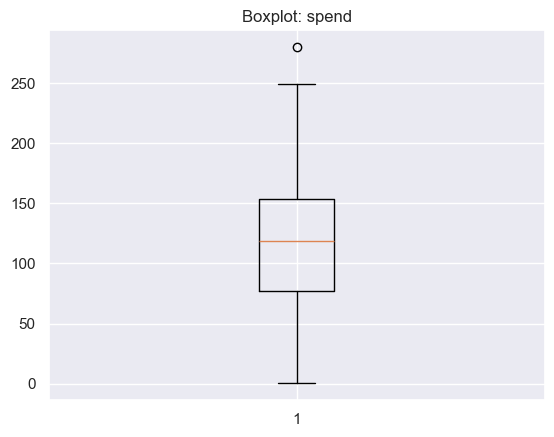

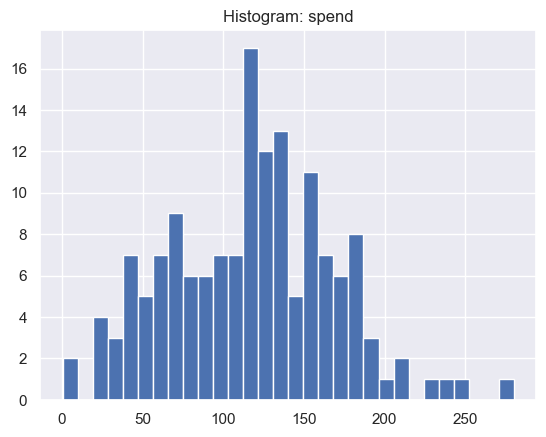

In [272]:
plt.figure()
plt.boxplot(df[target_col])
plt.title(f'Boxplot: {target_col}')
plt.show()

plt.figure()
plt.hist(df[target_col], bins=30)
plt.title(f'Histogram: {target_col}')
plt.show()

In [273]:
print(df.shape)

(152, 7)


In [274]:
# Drop rows where either condition is True
df.drop(df[df['outlier_iqr']].index, inplace=True)
df.shape

(151, 7)

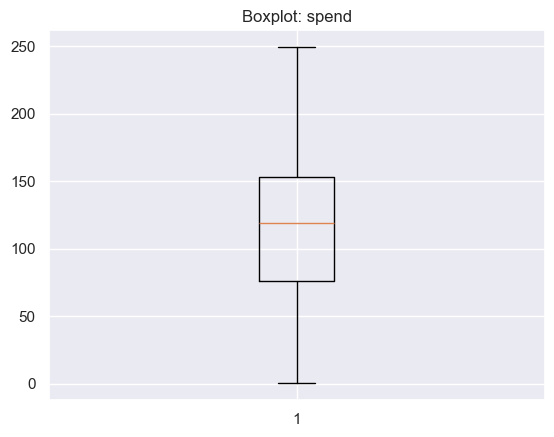

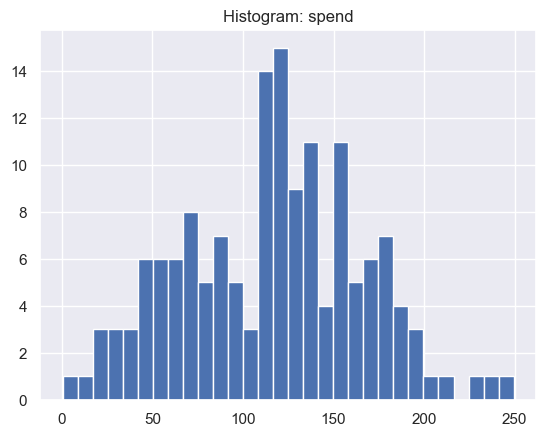

In [275]:
plt.figure()
plt.boxplot(df[target_col])
plt.title(f'Boxplot: {target_col}')
plt.show()

plt.figure()
plt.hist(df[target_col], bins=30)
plt.title(f'Histogram: {target_col}')
plt.show()

## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [283]:
X = df[['income','transactions']]
y = df['spend']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print regression line
intercept = lr.intercept_
coeffs = lr.coef_
features = X.columns

equation = f"ŷ = {intercept:.4f}"
for f, c in zip(features, coeffs):
    equation += f" + ({c:.4f} × {f})"

print("Regression Equation:")
print(equation)

print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Regression Equation:
ŷ = 43.8931 + (0.0011 × income) + (7.4038 × transactions)
Baseline   R²=0.3264  RMSE=42.063722


Statistical Analysis

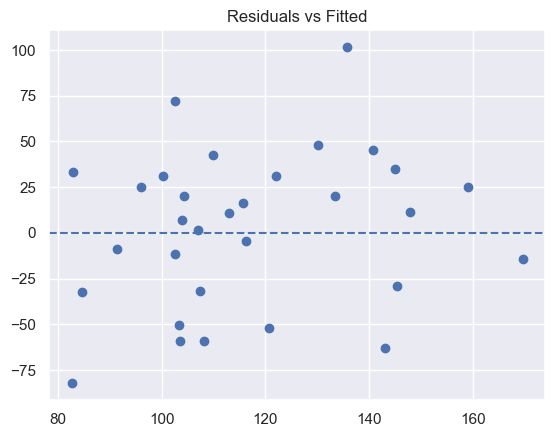

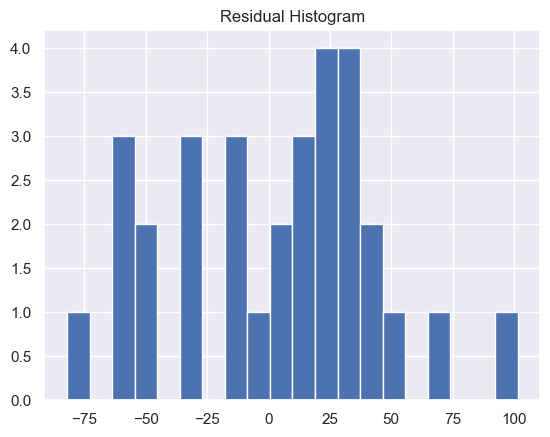

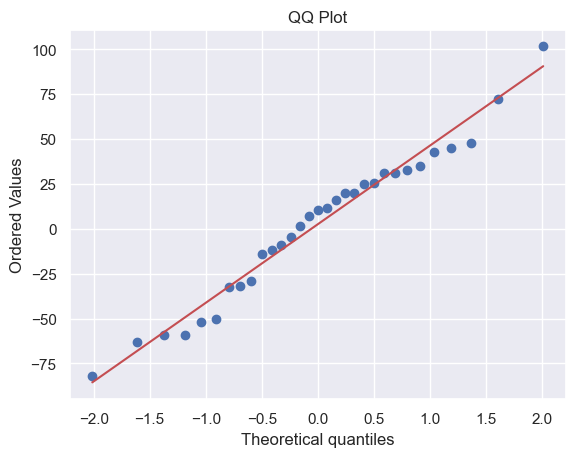

In [285]:
resid = y_test - y_pred

fitted = y_pred
plt.figure()
plt.scatter(fitted, resid); plt.axhline(0, ls='--')
plt.title('Residuals vs Fitted')
plt.show()
plt.figure()

plt.hist(resid, bins=20)
plt.title('Residual Histogram')
plt.show()
plt.figure()


st.probplot(resid, dist='norm', plot=plt)
plt.title('QQ Plot') 
plt.show()

## 4) Interpretation (write your conclusions below)
The dataset I took was from the homework 8. The price depended on the following equation:
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)



- Linearity: The residual vs fitted values does not appear to be non-linear. However, due to random shuffling, it is linearly random.
- Homoscedasticity: The data is homoscedastic in nature. There is no upward or downward increment like nature observed. 
- Normality: Some points are straying a bit away from the 45 degree line but in the overall scenario, it appear to be normal.
- Independence: The variables in the X are randomly generated. So, they are independent.
- Which model do you trust and why?: I would not trust this model for this purpose, because I feel that the variables of the datasets are random variables themselves and then the predictor variable is normal variable based on them.
- Next step you’d try:
I would like to utilize an artificial neural network for this task.